# TCS Stock Data Analysis and Prediction

**Domain:** Data Analyst

**Project Difficulty:** Advance

**Language:** Machine learning, python, SQL, Excel

**Tools:** VS code, Jupyter notebook

## About TCS (Tata Consultancy Services)
Tata Consultancy Services (TCS) is an Indian multinational information technology (IT) services and consulting company headquartered in Mumbai, Maharashtra, India with its largest campus located in Chennai, Tamil Nadu, India.

As of February 2021, TCS is the largest IT services company in the world by market capitalisation ($200 billion). It is a subsidiary of the Tata Group and operates in 149 locations across 46 countries.

TCS is the second largest Indian company by market capitalisation and is among the most valuable IT services brands worldwide. In 2015, TCS was ranked 64th overall in the Forbes World's Most Innovative Companies ranking, making it both the highest-ranked IT services company and the top Indian company. As of 2018, it is ranked eleventh on the Fortune India 500 list.

## Objective
Analyze the historical data of TCS stock to gain insights into stock behavior, identify trends, and forecast future stock prices using a Long Short-Term Memory (LSTM) model.

## Dataset Columns Explanation
1.  **Date** - Date of trading data.
2.  **Open** - Opening stock price on that day.
3.  **High** - Highest stock price of the day.
4.  **Low** - Lowest stock price of the day.
5.  **Close** - Closing stock price of the day.
6.  **Volume** - Number of shares traded.
7.  **Dividends** - Dividends paid on the stock.
8.  **Stock Splits** - Number of stock splits.

## Step-by-Step Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

**Loading Data**

In [2]:
# The path is from a Kaggle environment and may need to be changed.
# df=pd.read_csv('/kaggle/input/tcs-stock-data-live-and-latest/TCS_stock_history.csv')
# For this notebook to run, 'TCS_stock_history.csv' should be in the same folder.
df=pd.read_csv('TCS_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


**Data Preprocessing**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').set_index('Date')

**Descriptive Statistics**

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


**Correlation Of Features**

In [7]:
corel = df.corr()
corel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [8]:
correlation_with_close = df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


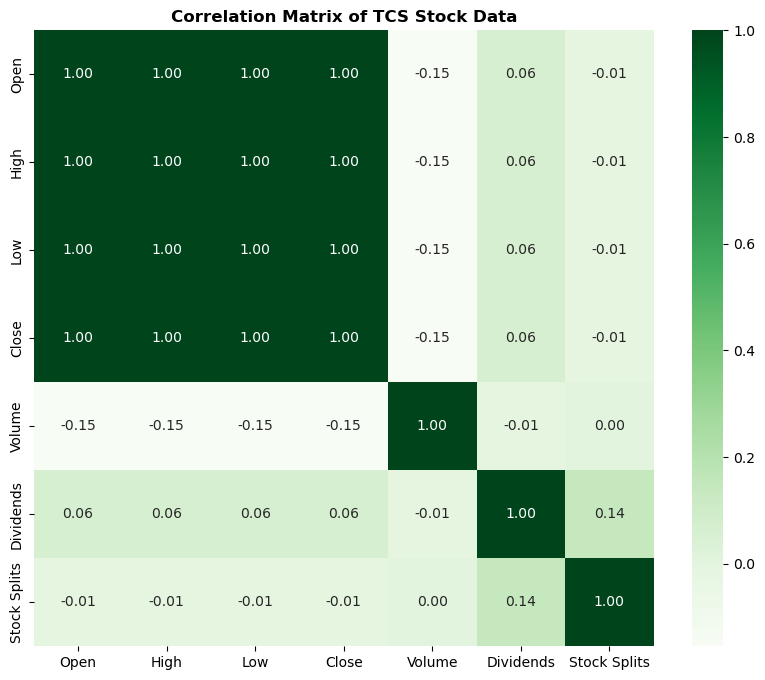

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corel, annot= True, cmap= "Greens", fmt=".2f")
plt.title('Correlation Matrix of TCS Stock Data', weight='bold')
plt.show()

**Exploratory Data Analysis**

### Time series of stock prices

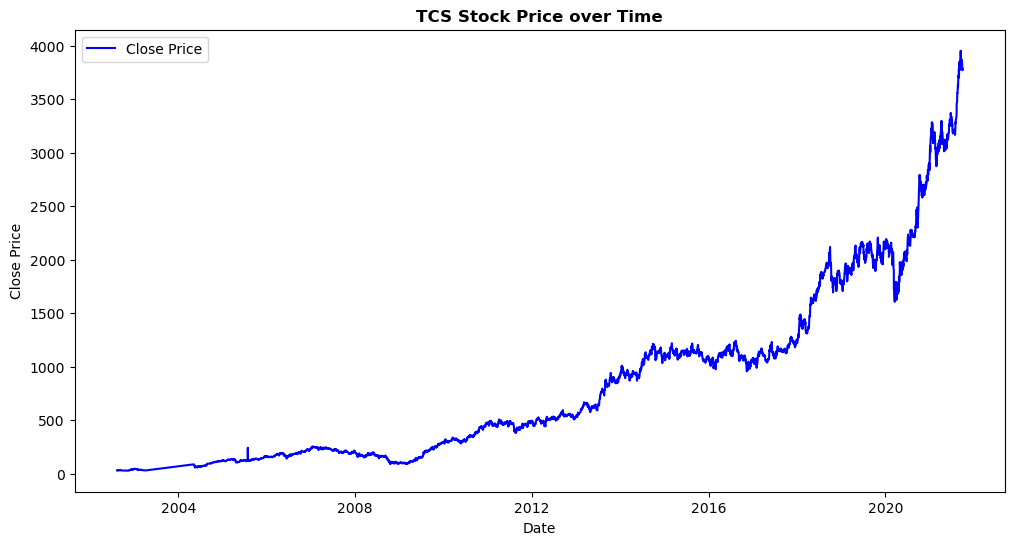

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time', weight = "bold")
plt.legend()
plt.show()

### Volume, Dividends, Stock Splits

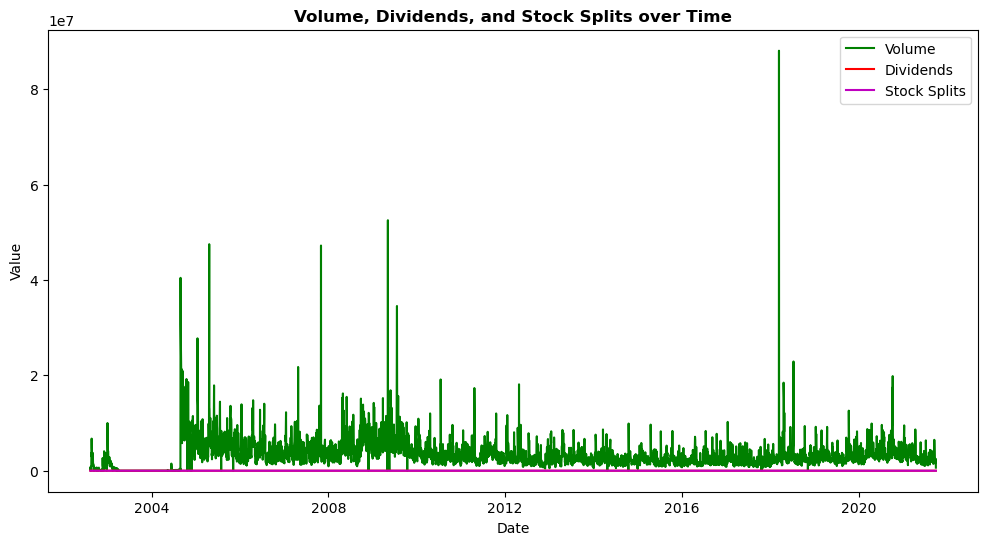

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Volume'], label='Volume', color='g')
plt.plot(df.index, df['Dividends'], label='Dividends', color='r')
plt.plot(df.index, df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time', weight = "bold")
plt.legend()
plt.show()

### Close vs Volume

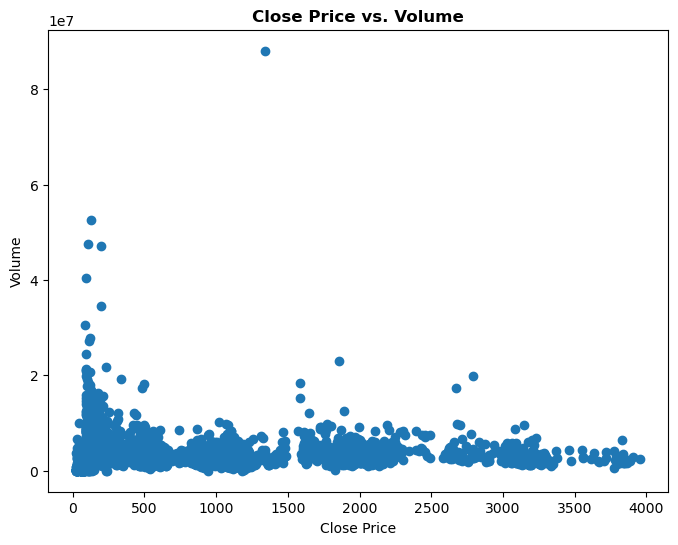

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume', weight= "bold")
plt.show()

### Dividends and Stock Splits vs Close Price

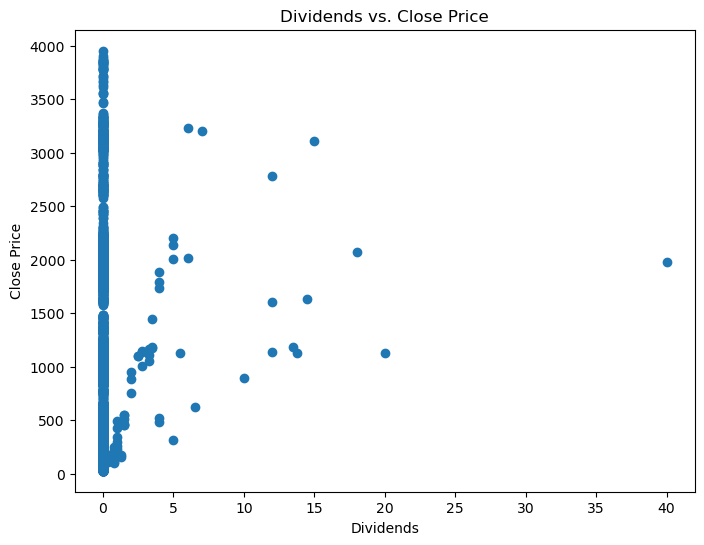

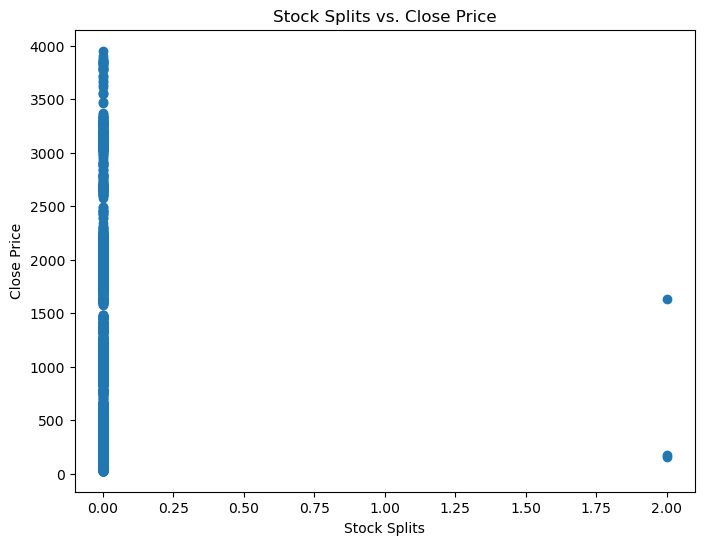

In [13]:
# Dividends vs. Close Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

### Moving Averages

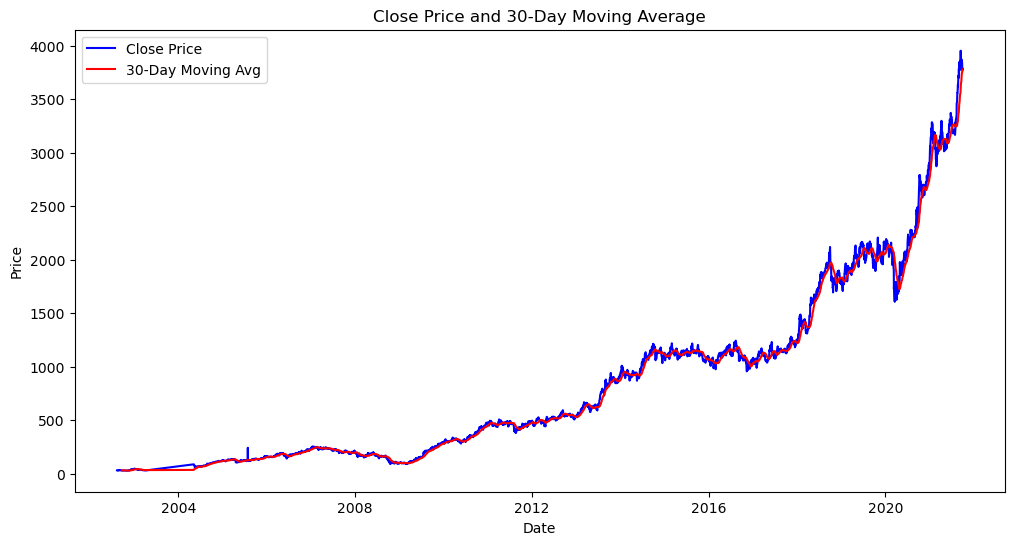

In [14]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='b')
plt.plot(df.index, df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

### Moving Average Crossover Strategy

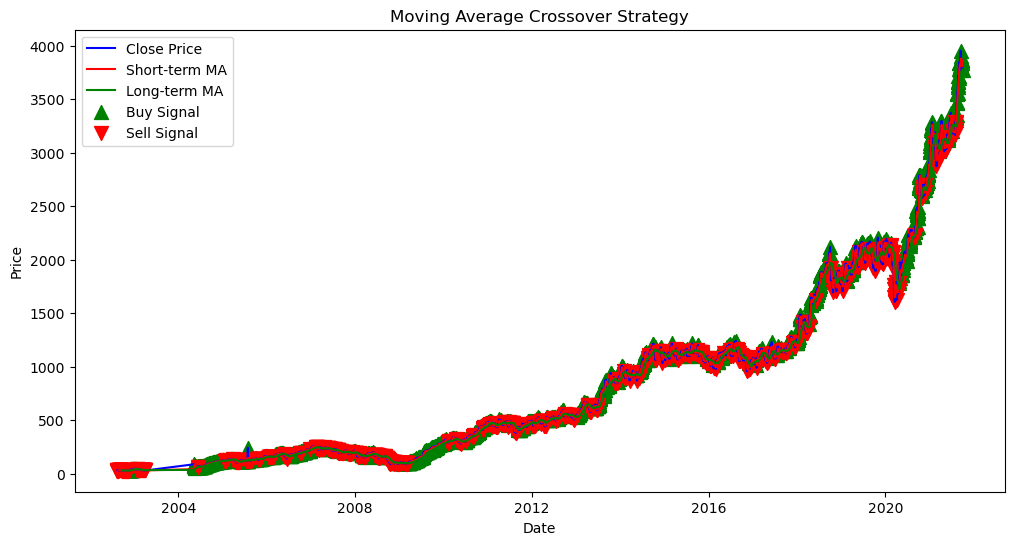

In [15]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price', color='b')
plt.plot(df.index, df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df.index, df['Long_MA'], label='Long-term MA', color='g')

# Create buy and sell signals for plotting
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

### Daily Price Change

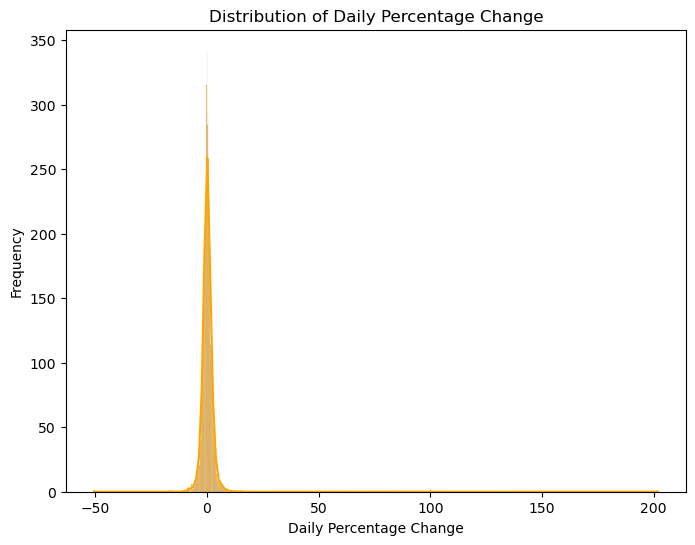

In [16]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8,6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

**Feature Engineering**

In [17]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

**Modelling**

In [18]:
# The shape will include the new columns we created.
df.shape

(4463, 13)

### Data Preparation & Normalization for LSTM

In [19]:
# Prepare the data for LSTM
# Drop NA values that resulted from moving average calculations
df.dropna(inplace=True)

close_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Create training and testing sets
train_size = int(len(scaled_prices) * 0.8)
test_size = len(scaled_prices) - train_size
train_data, test_data = scaled_prices[0:train_size,:], scaled_prices[train_size:len(scaled_prices),:]

# Function to create dataset with look-back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

### Reshaping Data for LSTM

In [20]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Building an LSTM Model

Now, we build the LSTM model. A Sequential model is appropriate here. We add an LSTM layer with 50 units. The input shape is `(1, look_back)` which corresponds to our single timestep and feature. A Dense layer with one unit is added as the output layer to predict the single continuous value of the stock price.

The model is compiled with the `adam` optimizer and `mean_squared_error` as the loss function, which are standard choices for regression problems in neural networks.

In [21]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 30
batch_size = 15

# Using model.fit for simplicity and better progress tracking
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0062 - val_loss: 0.0122
Epoch 2/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5027e-04 - val_loss: 0.0018
Epoch 3/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6856e-06 - val_loss: 0.0019
Epoch 4/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6359e-06 - val_loss: 0.0018
Epoch 5/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6617e-06 - val_loss: 0.0017
Epoch 6/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5179e-06 - val_loss: 0.0016
Epoch 7/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3435e-06 - val_loss: 0.0016
Epoch 8/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.4620e-06 - val_loss: 0.0013
Epoch 9/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2991e-06 - val_loss: 0.0013
Epoch 10/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2649e-06 - val_loss: 0.0011
Epoch 11/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1985e-06 - val_loss: 0.0011
Epoch 12/30


### Plotting Model Loss

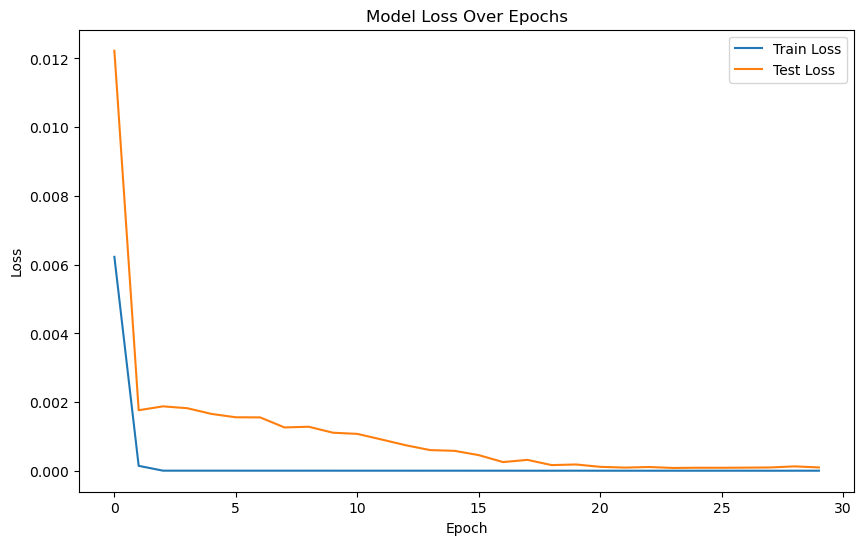

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

### Predictions using LSTM

In [23]:
lstm_predictions_scaled = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### Inverse transform of the predictions

In [24]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

### Visualization of LSTM predictions

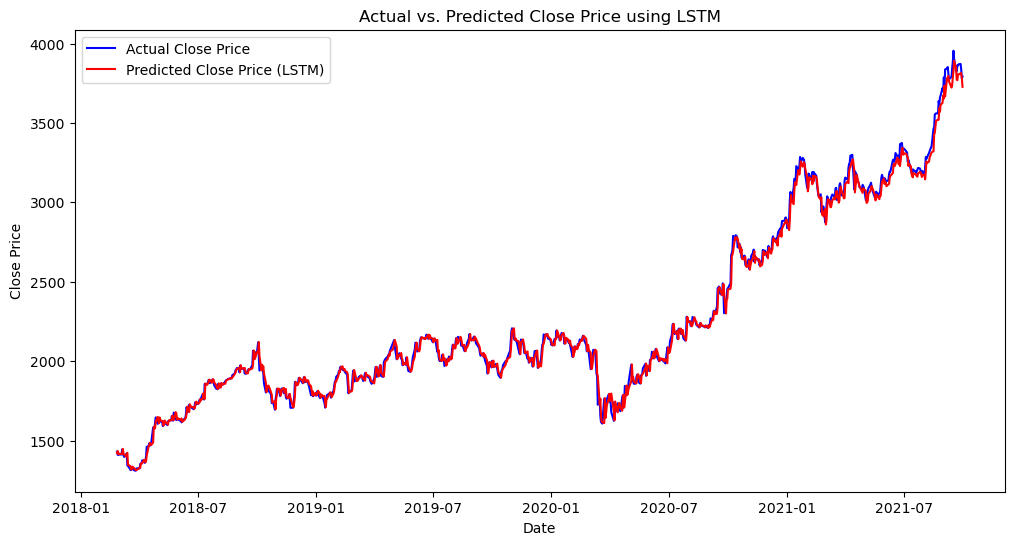

In [25]:
test_dates = df.index[train_size+look_back+1:]

plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_actual, label='Actual Close Price', color='b')
plt.plot(test_dates, lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

### Model Evaluation

In [26]:
lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))

print("LSTM Mean Absolute Error:", lstm_mae)
print("LSTM Root Mean Squared Error:", lstm_rmse)

LSTM Mean Absolute Error: 28.61863937808969
LSTM Root Mean Squared Error: 39.98750309447752


### Save Predictions to CSV

In [27]:
# Define the date index for the predictions to ensure alignment
test_dates = df.index[train_size+look_back+1:]

# Create a DataFrame with the dates and predictions
predictions_df = pd.DataFrame({
    'Date': test_dates,
    'Predicted_Close': lstm_predictions.flatten(),
    'Actual_Close': y_test_actual.flatten()
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")
predictions_df.head()

Predictions saved to predictions.csv


,Date,Predicted_Close,Actual_Close
0,2018-02-26,1421.624390,1430.180786
1,2018-02-27,1433.532715,1409.675049
2,2018-02-28,1413.017700,1414.627197
3,2018-03-01,1417.972534,1411.232910
4,2018-03-05,1414.576416,1412.465210


## Conclusion

This project aimed to analyze and predict the stock price of Tata Consultancy Services (TCS) using historical data. The analysis involved several stages:

1.  **Data Loading and Preprocessing:** The historical stock data for TCS was loaded, and the 'Date' column was converted to a datetime object and set as the index.

2.  **Exploratory Data Analysis (EDA):** Through various visualizations, we gained insights into the stock's behavior over time. We observed the overall trend of the closing price, trading volume, and the impact of dividends and stock splits. The correlation analysis revealed a very high correlation between the Open, High, Low, and Close prices, which is expected for stock data.

3.  **Modeling with LSTM:** A Long Short-Term Memory (LSTM) neural network was chosen for its effectiveness in handling sequential data like time series. The data was normalized and split into training and testing sets. The model was trained to predict the next day's closing price based on the previous day's price.

4.  **Results and Evaluation:** The LSTM model's predictions were compared against the actual closing prices. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were calculated to quantify the model's performance. The visualizations of the predicted versus actual prices show that the model was able to capture the general trend of the stock price, although with some error.